In [1]:
import pandas as pd
#import stumpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
import datetime as dt
import scipy
import sklearn
import copy
from tabulate import tabulate

plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

from google.colab import drive
drive.mount('/content/drive')
DATASET_PATH = '/content/drive/MyDrive/Project/AzureDataset_FunctionCalls/k6csv/'
DATA_PATH = '/content/drive/MyDrive/Project/AzureDataset_FunctionCalls/'

Mounted at /content/drive


In [2]:
import time

csvName = '36bc568292ec360f9cc2f4431fa0db953ce8714cdb1b165f4ec68ca54e7fe2be'

multiSeriesMain = pd.read_csv(DATA_PATH+csvName+'.csv')
multiSeriesMain = multiSeriesMain.loc[:, ~multiSeriesMain.columns.str.contains('^Unnamed')].astype(float).reset_index(drop=True)

In [3]:
csvName = 'Bogo3'
thingy = 'both'

csvArray = pd.read_csv(DATASET_PATH+'Baselines/'+csvName+'.csv', header=None, usecols=[0,1,2,])

loginArray = csvArray[csvArray[0].eq("get_bogo_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)
#booksArray = csvArray[csvArray[0].eq("get_write_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)
csvName = 'Bubble3'
thingy = 'both'

csvArray = pd.read_csv(DATASET_PATH+'Baselines/'+csvName+'.csv', header=None, usecols=[0,1,2,])

booksArray = csvArray[csvArray[0].eq("get_bubble_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)
#print(booksArray.describe())
#print(np.percentile(booksArray[2], 90))
#print(loginArray.iloc[5000:].describe())
#print(loginArray[2].iloc[5000:].quantile(0.9))

In [4]:
interval = 1
minutes = 15
warmup = 5
if thingy == 'login':
  startTime = int(loginArray[1].iloc[0:1])
  print(loginArray[(loginArray[1] >= startTime+60*(warmup+minutes*(interval-1))) & (loginArray[1] < startTime+60*(warmup+minutes*interval))].describe())
  print(loginArray[2][(loginArray[1] >= startTime+60*(warmup+minutes*(interval-1))) & (loginArray[1] < startTime+60*(warmup+minutes*interval))].quantile(0.9))
if thingy == 'flight':
  startTime = int(booksArray[1].iloc[0:1])
  print(booksArray[(booksArray[1] >= startTime+60*(warmup+minutes*(interval-1))) & (booksArray[1] < startTime+60*(warmup+minutes*interval))].describe())
  print(booksArray[2][(booksArray[1] >= startTime+60*(warmup+minutes*(interval-1))) & (booksArray[1] < startTime+60*(warmup+minutes*interval))].quantile(0.9))

if thingy == 'both':
  startTime = int(booksArray[1].iloc[0:1])
  print(loginArray[(loginArray[1] >= startTime+60*(warmup+minutes*(interval-1))) & (loginArray[1] < startTime+60*(warmup+minutes*interval))].describe())
  print("90% ", np.percentile(loginArray[2][(loginArray[1] >= startTime+60*(warmup+minutes*(interval-1))) & (loginArray[1] < startTime+60*(warmup+minutes*interval))], 90))
  print("95% ",loginArray[2][(loginArray[1] >= startTime+60*(warmup+minutes*(interval-1))) & (loginArray[1] < startTime+60*(warmup+minutes*interval))].quantile(0.95))
  print("99% ",loginArray[2][(loginArray[1] >= startTime+60*(warmup+minutes*(interval-1))) & (loginArray[1] < startTime+60*(warmup+minutes*interval))].quantile(0.99))
  print(booksArray[(booksArray[1] >= startTime+60*(warmup+minutes*(interval-1))) & (booksArray[1] < startTime+60*(warmup+minutes*interval))].describe())
  print("90% ",np.percentile(booksArray[2][(booksArray[1] >= startTime+60*(warmup+minutes*(interval-1))) & (booksArray[1] < startTime+60*(warmup+minutes*interval))], 90))
  print("95% ",booksArray[2][(booksArray[1] >= startTime+60*(warmup+minutes*(interval-1))) & (booksArray[1] < startTime+60*(warmup+minutes*interval))].quantile(0.95))
  print("99% ",booksArray[2][(booksArray[1] >= startTime+60*(warmup+minutes*(interval-1))) & (booksArray[1] < startTime+60*(warmup+minutes*interval))].quantile(0.99))

                  1             2
count  8.068000e+04  80680.000000
mean   1.699218e+09     14.318475
std    2.596010e+02      7.744771
min    1.699217e+09      8.534210
25%    1.699218e+09     11.909669
50%    1.699218e+09     12.291934
75%    1.699218e+09     12.814109
max    1.699218e+09    118.023944
90%  17.107672900000004
95%  31.98713035000001
99%  48.559575330000044
                  1             2
count  5.619000e+04  56190.000000
mean   1.699218e+09     15.854004
std    2.593255e+02      3.705762
min    1.699217e+09     11.285539
25%    1.699218e+09     14.857048
50%    1.699218e+09     15.171085
75%    1.699218e+09     15.980067
max    1.699218e+09     85.423921
90%  17.6152656
95%  19.88453165
99%  29.16113925000001


In [5]:
confidence = False
if confidence:
  from scipy.stats import t
  interval = 1
  minutes = 60
  warmup = 5
  m = loginArray[2][(loginArray[1] >= startTime+60*(warmup+minutes*(interval-1))) & (loginArray[1] < startTime+60*(warmup+minutes*interval))].mean()
  s = loginArray[2][(loginArray[1] >= startTime+60*(warmup+minutes*(interval-1))) & (loginArray[1] < startTime+60*(warmup+minutes*interval))].std()
  dof = len(loginArray[2][(loginArray[1] >= startTime+60*(warmup+minutes*(interval-1))) & (loginArray[1] < startTime+60*(warmup+minutes*interval))])-1
  length = len(loginArray[2][(loginArray[1] >= startTime+60*(warmup+minutes*(interval-1))) & (loginArray[1] < startTime+60*(warmup+minutes*interval))])
  confidence = 0.95

  t_crit = np.abs(t.ppf((1-confidence)/2,dof))
  print((m-s*t_crit/np.sqrt(length), m+s*t_crit/np.sqrt(length)) )

In [6]:
if thingy == 'login':
  startTime = int(loginArray[1].iloc[0:1])
  endTime = int(loginArray[1].iloc[-1])
  maxTime = int((endTime-startTime)/60)
  means = []
  nintieth = []

  for i in range(maxTime):
    means.append(loginArray[2][(loginArray[1] >= startTime+60*(i)) & (loginArray[1] < startTime+60*(1+i))].mean())
    nintieth.append(loginArray[2][(loginArray[1] >= startTime+60*(i)) & (loginArray[1] < startTime+60*(1+i))].quantile(0.9))
  readable = pd.DataFrame(np.array([means,nintieth]), index = ['mean', '90'])
  print(readable)
  print(readable.loc['mean'].mean())
  print(readable.loc['90'].mean())
if thingy == 'flight':
  startTime = int(booksArray[1].iloc[0:1])
  endTime = int(booksArray[1].iloc[-1])
  maxTime = int((endTime-startTime)/60)
  means = []
  nintieth = []

  for i in range(maxTime):
    means.append(booksArray[2][(booksArray[1] >= startTime+60*(i)) & (booksArray[1] < startTime+60*(1+i))].mean())
    nintieth.append(booksArray[2][(booksArray[1] >= startTime+60*(i)) & (booksArray[1] < startTime+60*(1+i))].quantile(0.9))
  readable = pd.DataFrame(np.array([means,nintieth]), index = ['mean', '90'])
  print(readable)
  print(readable.loc['mean'].mean())
  print(readable.loc['90'].mean())

if thingy == 'both':
  startTime = int(booksArray[1].iloc[0:1])
  endTime = int(booksArray[1].iloc[-1])
  maxTime = int((endTime-startTime)/60)
  means = []
  nintieth = []
  ninetyFive = []
  ninetyNine = []

  for i in range(maxTime):
    means.append(loginArray[2][(loginArray[1] >= startTime+60*(i)) & (loginArray[1] < startTime+60*(1+i))].mean())
    nintieth.append(loginArray[2][(loginArray[1] >= startTime+60*(i)) & (loginArray[1] < startTime+60*(1+i))].quantile(0.9))
    ninetyFive.append(loginArray[2][(loginArray[1] >= startTime+60*(i)) & (loginArray[1] < startTime+60*(1+i))].quantile(0.95))
    ninetyNine.append(loginArray[2][(loginArray[1] >= startTime+60*(i)) & (loginArray[1] < startTime+60*(1+i))].quantile(0.5))
  readable = pd.DataFrame(np.array([means,nintieth,ninetyFive,ninetyNine]), index = ['mean', '90', '95','50'])
  print(readable)
  print(readable.loc['mean'].mean())
  print(readable.loc['90'].mean())

  means = []
  nintieth = []
  ninetyFive = []
  ninetyNine = []

  for i in range(maxTime):
    means.append(booksArray[2][(booksArray[1] >= startTime+60*(i)) & (booksArray[1] < startTime+60*(1+i))].mean())
    nintieth.append(booksArray[2][(booksArray[1] >= startTime+60*(i)) & (booksArray[1] < startTime+60*(1+i))].quantile(0.9))
    ninetyFive.append(booksArray[2][(booksArray[1] >= startTime+60*(i)) & (booksArray[1] < startTime+60*(1+i))].quantile(0.95))
    ninetyNine.append(booksArray[2][(booksArray[1] >= startTime+60*(i)) & (booksArray[1] < startTime+60*(1+i))].quantile(0.5))
  readablex = pd.DataFrame(np.array([means,nintieth,ninetyFive,ninetyNine]), index = ['mean', '90', '95','50'])
  print(readablex)
  print(readablex.loc['mean'].mean())
  print(readablex.loc['90'].mean())

           0          1          2          3          4          5     \
mean  15.313989  16.279150  15.806789  14.209605  14.794586  14.445340   
90    21.137324  21.259021  20.706307  14.498193  14.500753  16.356024   
95    21.582904  22.319181  21.067775  14.630847  16.223807  34.254965   
50    14.238810  14.036977  13.629300  13.968222  13.959592  12.255836   

           6          7          8          9     ...       1434       1435  \
mean  13.531917  15.482415  13.822861  13.429297  ...  16.730933  12.453754   
90    13.389144  28.266651  13.816253  13.356315  ...  27.842514  14.507328   
95    21.360636  39.368027  24.056308  21.183642  ...  30.054314  14.991066   
50    12.259839  12.461036  12.573716  12.210869  ...  14.074983  12.428604   

           1436       1437       1438       1439       1440       1441  \
mean  14.274646  16.602054  17.257299  17.075564  16.073951  16.737556   
90    19.466084  26.427003  28.591686  29.021071  27.356839  29.259631   
95    27.40

<Axes: >

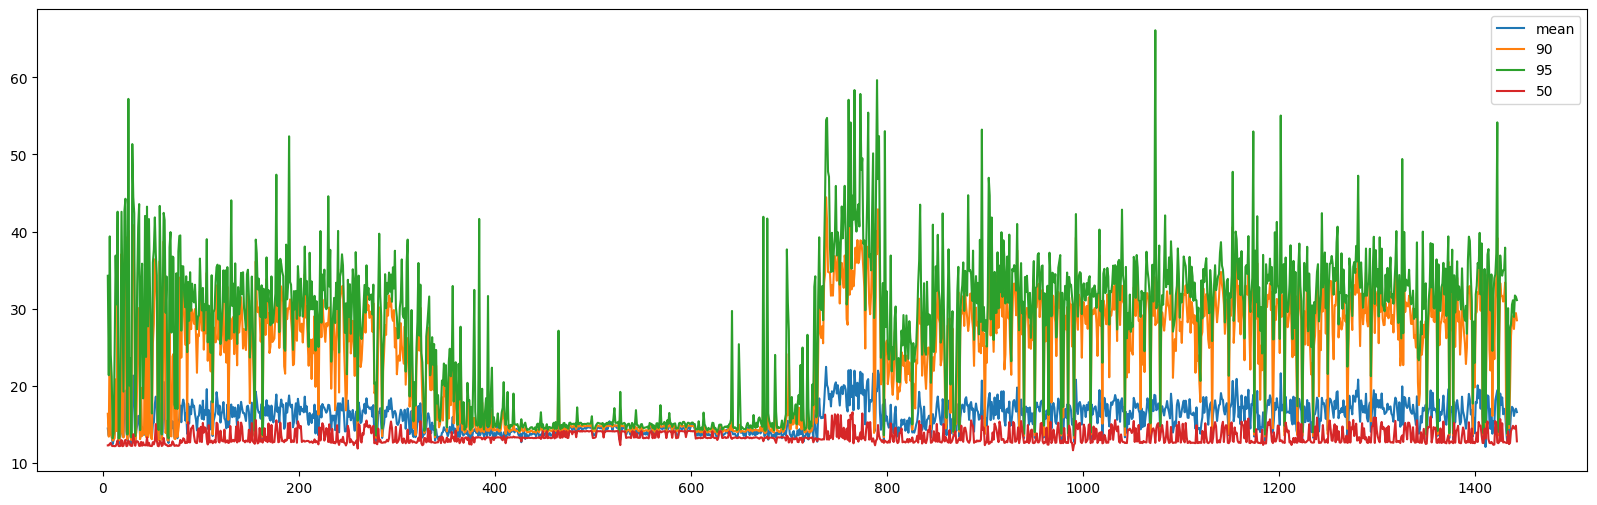

In [7]:
readable.T.iloc[5:].plot()

<Axes: >

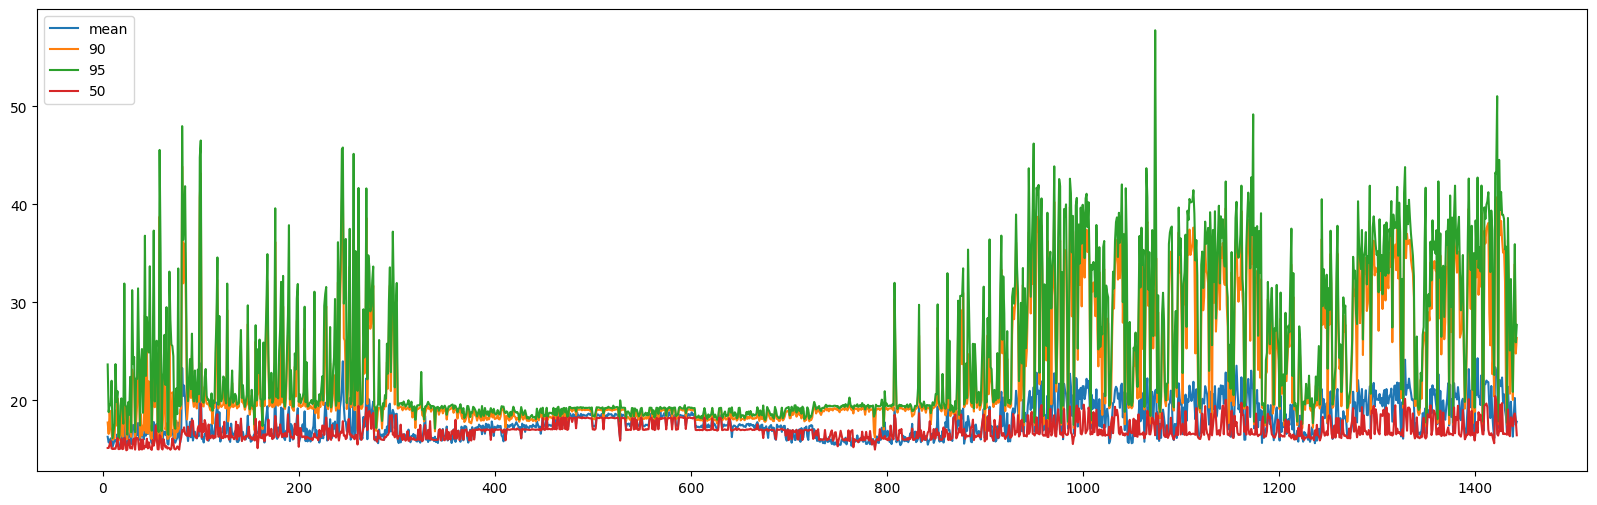

In [8]:
readablex.T.iloc[5:].plot()

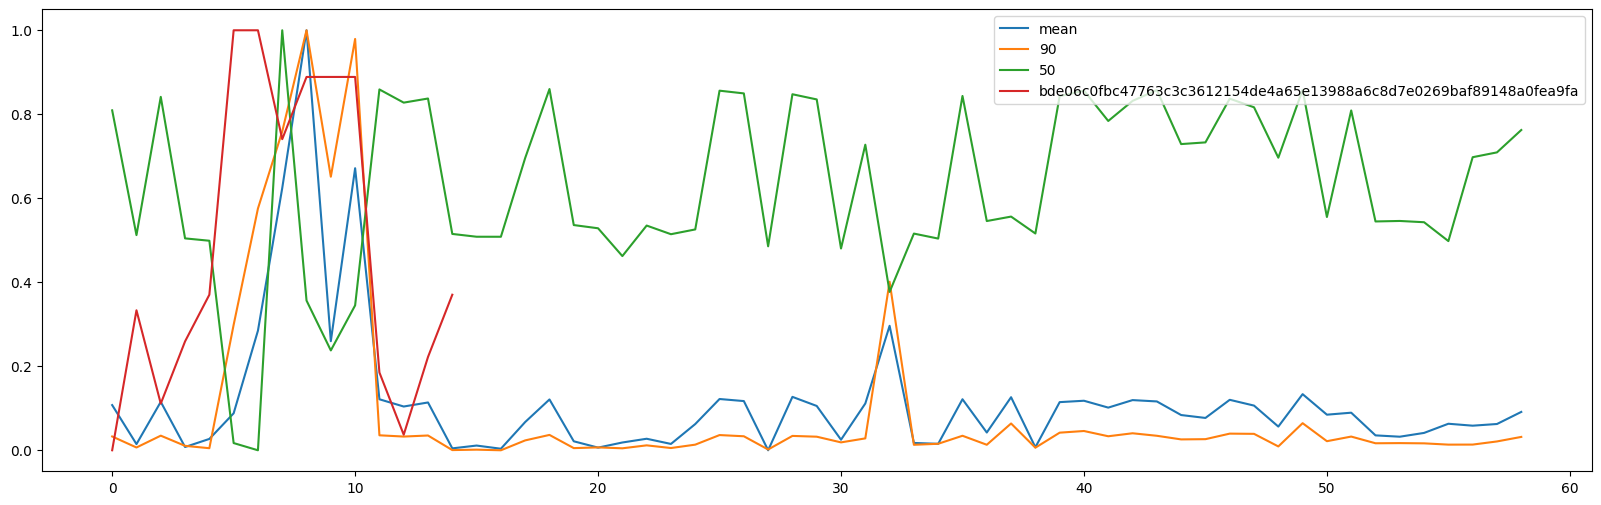

In [ ]:
warmup = 5

authM = multiSeriesMain['bde06c0fbc47763c3c3612154de4a65e13988a6c8d7e0269baf89148a0fea9fa'].iloc[1010:1025].reset_index(drop=True)
readableNormAuthMean=(readable.loc['mean'].iloc[warmup:]-readable.loc['mean'].iloc[warmup:].min())/(readable.loc['mean'].iloc[warmup:].max()-readable.loc['mean'].iloc[warmup:].min())
readableNormAuthMean.T.reset_index(drop=True).plot()
readableNormAuth90=(readable.loc['90'].iloc[warmup:]-readable.loc['90'].iloc[warmup:].min())/(readable.loc['90'].iloc[warmup:].max()-readable.loc['90'].iloc[warmup:].min())
readableNormAuth90.T.reset_index(drop=True).plot()
readableNormAuth95=(readable.loc['50'].iloc[warmup:]-readable.loc['50'].iloc[warmup:].min())/(readable.loc['50'].iloc[warmup:].max()-readable.loc['50'].iloc[warmup:].min())
readableNormAuth95.T.reset_index(drop=True).plot()
normAuth = (authM-authM.min())/(authM.max()-authM.min())
normAuth.plot()
plt.legend()

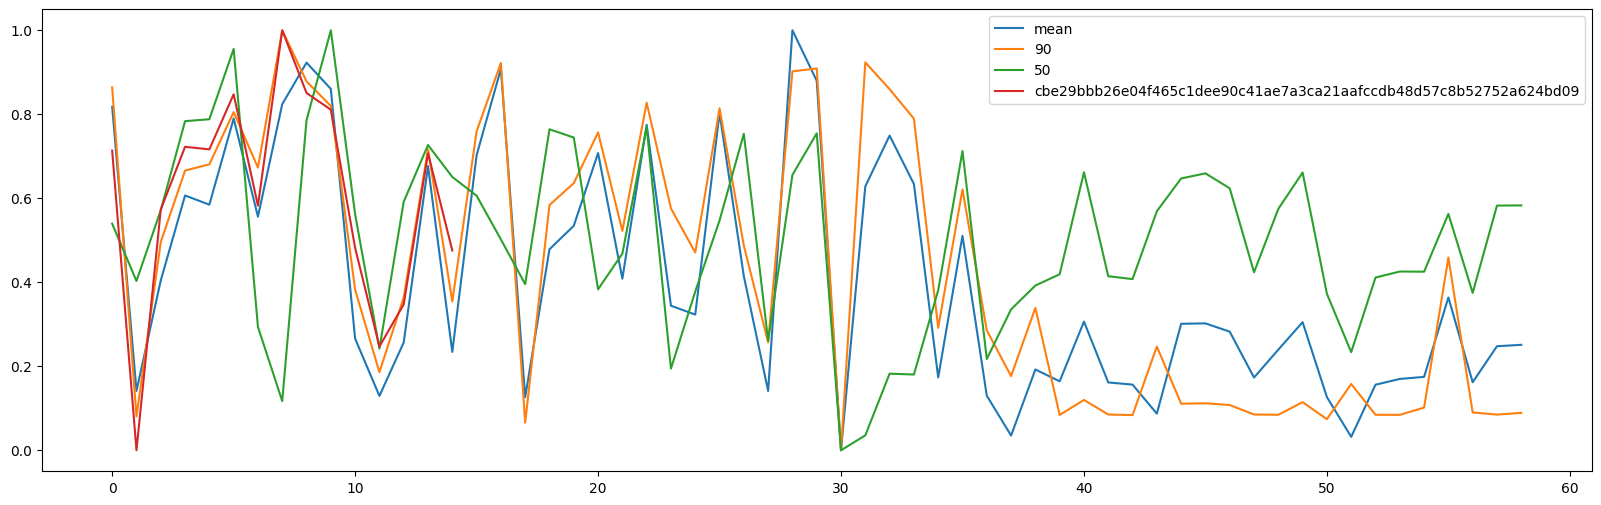

In [ ]:
flightM = multiSeriesMain['cbe29bbb26e04f465c1dee90c41ae7a3ca21aafccdb48d57c8b52752a624bd09'].iloc[1010:1025].reset_index(drop=True)
readableNormFlightMean=(readablex.loc['mean'].iloc[warmup:]-readablex.loc['mean'].iloc[warmup:].min())/(readablex.loc['mean'].iloc[warmup:].max()-readablex.loc['mean'].iloc[warmup:].min())
readableNormFlightMean.T.reset_index(drop=True).plot()
readableNormFlight90=(readablex.loc['90'].iloc[warmup:]-readablex.loc['90'].iloc[warmup:].min())/(readablex.loc['90'].iloc[warmup:].max()-readablex.loc['90'].iloc[warmup:].min())
readableNormFlight90.T.reset_index(drop=True).plot()
readableNormFlight95=(readablex.loc['50'].iloc[warmup:]-readablex.loc['50'].iloc[warmup:].min())/(readablex.loc['50'].iloc[warmup:].max()-readablex.loc['50'].iloc[warmup:].min())
readableNormFlight95.T.reset_index(drop=True).plot()
normFlight = (flightM-flightM.min())/(flightM.max()-flightM.min())
normFlight.plot()
plt.legend()

In [ ]:
csvName = 'mat60_finalester2'
csvArray = pd.read_csv(DATASET_PATH+csvName+'.csv', header=None, usecols=[0,1,2,])
loginArray = csvArray[csvArray[0].eq("get_bogo_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)
booksArray = csvArray[csvArray[0].eq("get_bubble_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)
csvName = 'restartHourClust1minMax'
csvArray = pd.read_csv(DATASET_PATH+csvName+'.csv', header=None, usecols=[0,1,2,])
loginArrayClust = csvArray[csvArray[0].eq("get_bogo_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)
booksArrayClust = csvArray[csvArray[0].eq("get_bubble_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)
csvName = 'mat60_80_Ramp2'
csvArray = pd.read_csv(DATASET_PATH+csvName+'.csv', header=None, usecols=[0,1,2,])
loginArrayBin = csvArray[csvArray[0].eq("get_bogo_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)
booksArrayBin = csvArray[csvArray[0].eq("get_bubble_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)

<ipython-input-10-08b0453739d9>:2: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  csvArray = pd.read_csv(DATASET_PATH+csvName+'.csv', header=None, usecols=[0,1,2,])
<ipython-input-10-08b0453739d9>:6: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  csvArray = pd.read_csv(DATASET_PATH+csvName+'.csv', header=None, usecols=[0,1,2,])
<ipython-input-10-08b0453739d9>:10: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  csvArray = pd.read_csv(DATASET_PATH+csvName+'.csv', header=None, usecols=[0,1,2,])


In [ ]:
from collections import Counter

In [ ]:
minutes= 60
warmup = 5
interval = 1
startTime = int(loginArray[1].iloc[0:1])
startTimeC = int(loginArrayClust[1].iloc[0:1])
startTimeB = int(loginArrayBin[1].iloc[0:1])
totalLogin = loginArray[2][(loginArray[1] >= startTime+60*(warmup+minutes*(interval-1))) & (loginArray[1] < startTime+60*(warmup+minutes*interval))]
totalLoginClust = loginArrayClust[2][(loginArrayClust[1] >= startTimeC+60*(warmup+minutes*(interval-1))) & (loginArrayClust[1] < startTimeC+60*(warmup+minutes*interval))]
totalLoginBin = loginArrayBin[2][(loginArrayBin[1] >= startTimeB+60*(warmup+minutes*(interval-1))) & (loginArrayBin[1] < startTimeB+60*(warmup+minutes*interval))]
totalBooks = booksArray[2][(booksArray[1] >= startTime+60*(warmup+minutes*(interval-1))) & (booksArray[1] < startTime+60*(warmup+minutes*interval))]
totalBooksClust = booksArrayClust[2][(booksArrayClust[1] >= startTimeC+60*(warmup+minutes*(interval-1))) & (booksArrayClust[1] < startTimeC+60*(warmup+minutes*interval))]
totalBooksBin= booksArrayBin[2][(booksArrayBin[1] >= startTimeB+60*(warmup+minutes*(interval-1))) & (booksArrayBin[1] < startTimeB+60*(warmup+minutes*interval))]
print(abs(len(totalLogin) - len(totalLoginClust)))
print(abs(len(totalBooks) - len(totalBooksClust)))
print(np.var(totalLogin), np.var(totalLoginClust))

print(scipy.stats.ttest_ind(a=totalLogin, b=totalLoginClust, equal_var=True))
print(scipy.stats.ttest_ind(a=totalBooks, b=totalBooksClust, equal_var=True))

if len(totalBooks) > len(totalBooksClust):
  lowerBooksLength = len(totalBooksClust)
else:
  lowerBooksLength = len(totalBooks)
if len(totalLogin) > len(totalLoginClust):
  lowerLoginLength = len(totalLoginClust)
else:
  lowerLoginLength = len(totalLogin)

print(np.corrcoef(totalLogin.iloc[0:lowerLoginLength],totalLoginClust.iloc[0:lowerLoginLength]))
print(np.corrcoef(totalBooks.iloc[0:lowerBooksLength],totalBooksClust.iloc[0:lowerBooksLength]))

print(scipy.stats.t.interval(confidence=0.95, df = len(totalLogin)-1, loc= totalLogin.mean(), scale=scipy.stats.sem(totalLogin)))
print(scipy.stats.t.interval(confidence=0.95, df = len(totalLoginClust)-1, loc= totalLoginClust.mean(), scale=scipy.stats.sem(totalLoginClust)))
print(scipy.stats.t.interval(confidence=0.95, df = len(totalLoginBin)-1, loc= totalLoginBin.mean(), scale=scipy.stats.sem(totalLoginBin)))
print(scipy.stats.t.interval(confidence=0.95, df = len(totalBooks)-1, loc= totalBooks.mean(), scale=scipy.stats.sem(totalBooks)))
print(scipy.stats.t.interval(confidence=0.95, df = len(totalBooksClust)-1, loc= totalBooksClust.mean(), scale=scipy.stats.sem(totalBooksClust)))
print(scipy.stats.t.interval(confidence=0.95, df = len(totalBooksBin)-1, loc= totalBooksBin.mean(), scale=scipy.stats.sem(totalBooksBin)))

188634
297369
25.58431659670886 25.1493372339543
TtestResult(statistic=20.17823626692063, pvalue=1.6997356156040095e-90, df=374060.0)
TtestResult(statistic=124.83155542027775, pvalue=0.0, df=697699.0)
[[1.       0.002054]
 [0.002054 1.      ]]
[[1.         0.00878979]
 [0.00878979 1.        ]]
(14.773145988868281, 14.81052654179125)
(14.373871395233937, 14.438433356001045)
(13.671854156630364, 13.68264377001795)
(8.02775373281661, 8.034229145883383)
(7.664812384613923, 7.672719854567556)
(7.721140655549658, 7.725905883213202)


<Axes: >

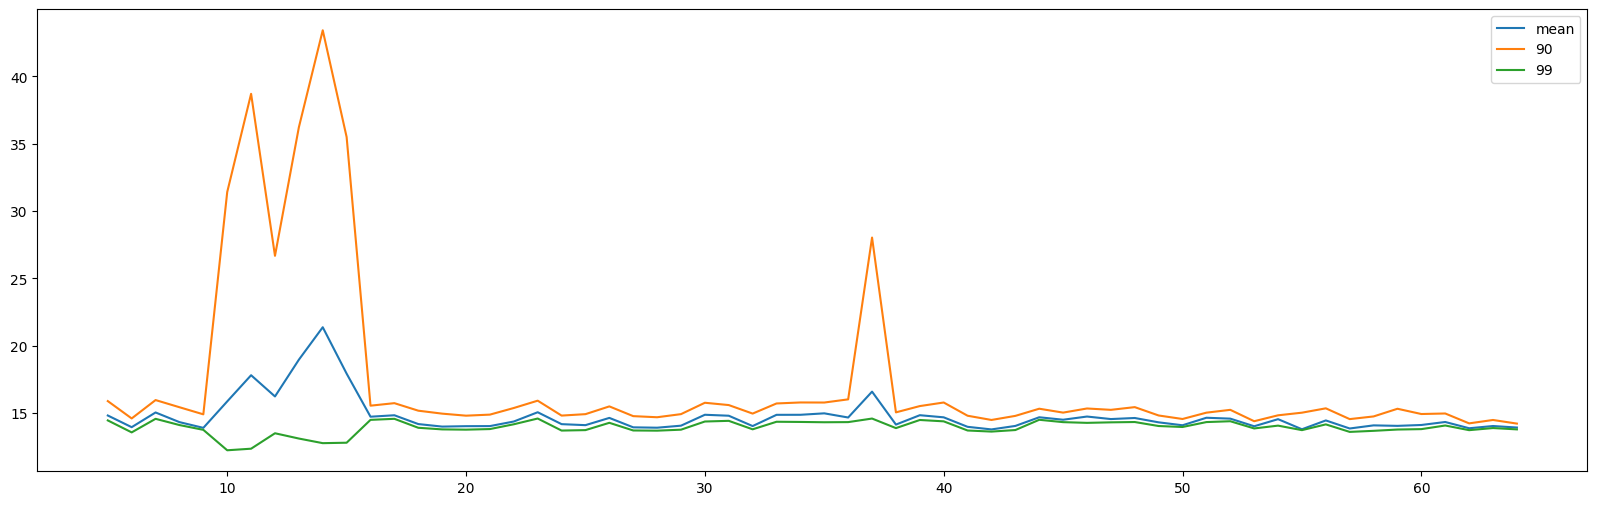

In [ ]:
startTime = int(loginArray[1].iloc[0:1])
endTime = int(loginArray[1].iloc[-1])
maxTime = round((endTime-startTime)/60)
means = []
nintieth = []
ninetyNine = []

for i in range(maxTime):
  means.append(loginArray[2][(loginArray[1] >= startTime+60*(i)) & (loginArray[1] < startTime+60*(1+i))].mean())
  nintieth.append(loginArray[2][(loginArray[1] >= startTime+60*(i)) & (loginArray[1] < startTime+60*(1+i))].quantile(0.9))
  ninetyNine.append(loginArray[2][(loginArray[1] >= startTime+60*(i)) & (loginArray[1] < startTime+60*(1+i))].quantile(0.50))
loginBase = pd.DataFrame(np.array([means,nintieth,ninetyNine]), index = ['mean', '90','99'])
loginBase.T.iloc[5:].plot()
# print(loginBase.T.iloc[5:].describe())
# print(loginBase.T.iloc[5:].quantile(0.9))

49


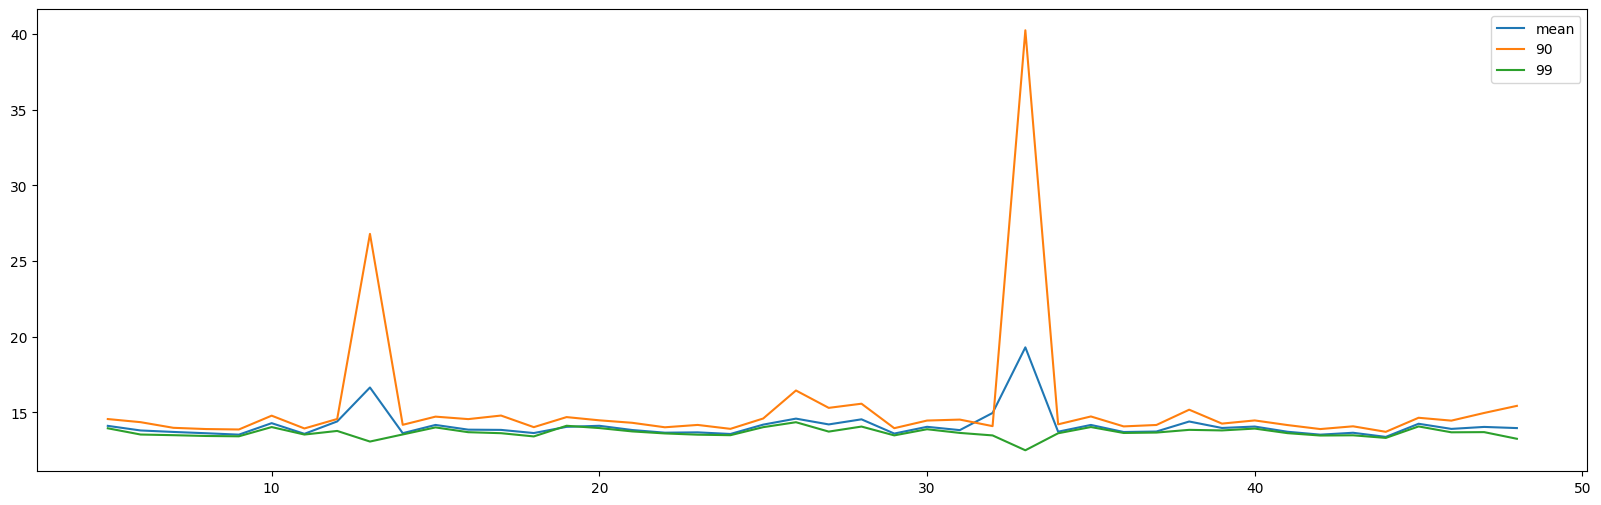

In [ ]:
startTime = int(loginArrayClust[1].iloc[0:1])
endTime = int(loginArrayClust[1].iloc[-1])
maxTime = round((endTime-startTime)/60)
means = []
nintieth = []
ninetyNine = []

for i in range(maxTime):
  means.append(loginArrayClust[2][(loginArrayClust[1] >= startTime+60*(i)) & (loginArrayClust[1] < startTime+60*(1+i))].mean())
  nintieth.append(loginArrayClust[2][(loginArrayClust[1] >= startTime+60*(i)) & (loginArrayClust[1] < startTime+60*(1+i))].quantile(0.9))
  ninetyNine.append(loginArrayClust[2][(loginArrayClust[1] >= startTime+60*(i)) & (loginArrayClust[1] < startTime+60*(1+i))].quantile(0.50))
loginClust = pd.DataFrame(np.array([means,nintieth,ninetyNine]), index = ['mean', '90','99'])
loginClust.T.iloc[5:].plot()
print(len(loginClust.loc['mean']))
# print(loginClust.T.iloc[5:].describe())
# print(loginClust.T.iloc[5:].quantile(0.9))

In [ ]:
startTime = int(loginArrayBin[1].iloc[0:1])
endTime = int(loginArrayBin[1].iloc[-1])
maxTime = round((endTime-startTime)/60)
means = []
nintieth = []

for i in range(maxTime):
  means.append(loginArrayBin[2][(loginArrayBin[1] >= startTime+60*(i)) & (loginArrayBin[1] < startTime+60*(1+i))].mean())
  nintieth.append(loginArrayBin[2][(loginArrayBin[1] >= startTime+60*(i)) & (loginArrayBin[1] < startTime+60*(1+i))].quantile(0.9))
loginBin = pd.DataFrame(np.array([means,nintieth]), index = ['mean', '90'])
#loginBin.T.iloc[5:].plot()
#print(loginBin.T.iloc[5:].describe())
#print(loginBin.T.iloc[5:].quantile(0.9))

In [ ]:
#plt.hist(Counter(round(loginClust.loc['mean'], 2)), bins='auto')

In [ ]:
#plt.hist(Counter(round(loginArrayClust, 2)), bins='auto')

<Axes: >

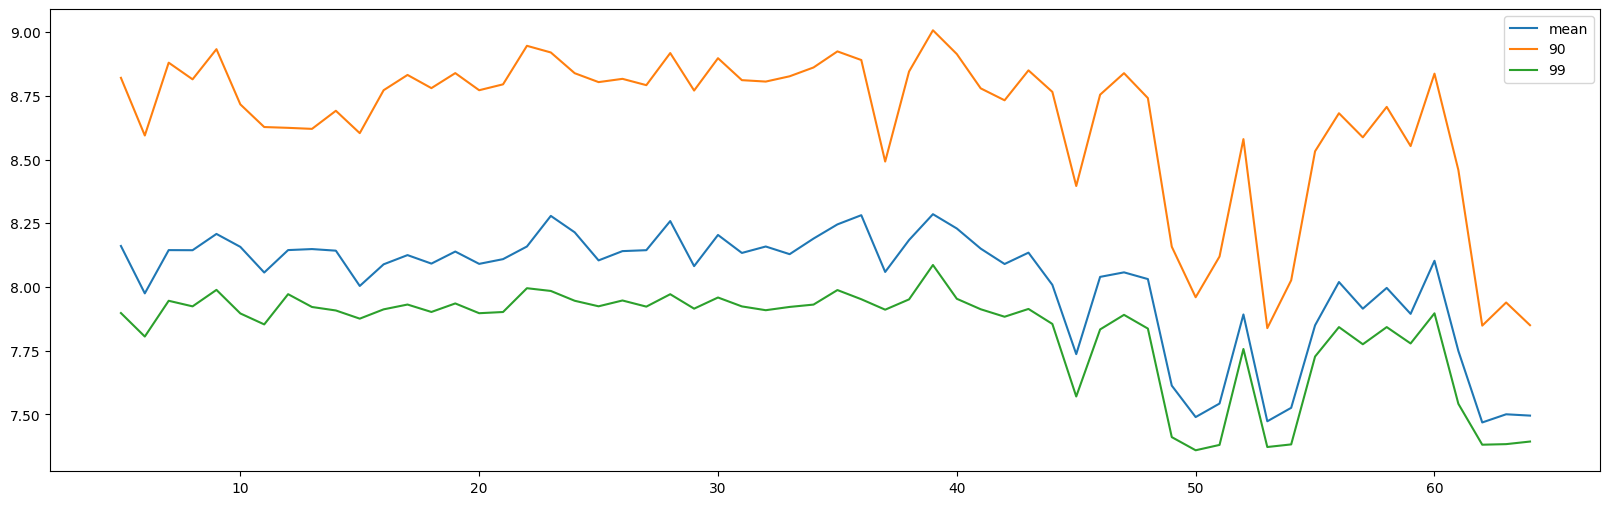

In [ ]:
startTime = int(booksArray[1].iloc[0:1])
endTime = int(booksArray[1].iloc[-1])
maxTime = round((endTime-startTime)/60)
means = []
nintieth = []
ninetyNine = []

for i in range(maxTime):
  means.append(booksArray[2][(booksArray[1] >= startTime+60*(i)) & (booksArray[1] < startTime+60*(1+i))].mean())
  nintieth.append(booksArray[2][(booksArray[1] >= startTime+60*(i)) & (booksArray[1] < startTime+60*(1+i))].quantile(0.9))
  ninetyNine.append(booksArray[2][(booksArray[1] >= startTime+60*(i)) & (booksArray[1] < startTime+60*(1+i))].quantile(0.5))
booksBase = pd.DataFrame(np.array([means,nintieth,ninetyNine]), index = ['mean', '90','99'])
booksBase.T.iloc[5:].plot()
#print(booksBase.T.iloc[5:].describe())
#print(booksBase.T.iloc[5:].quantile(0.9))

<Axes: >

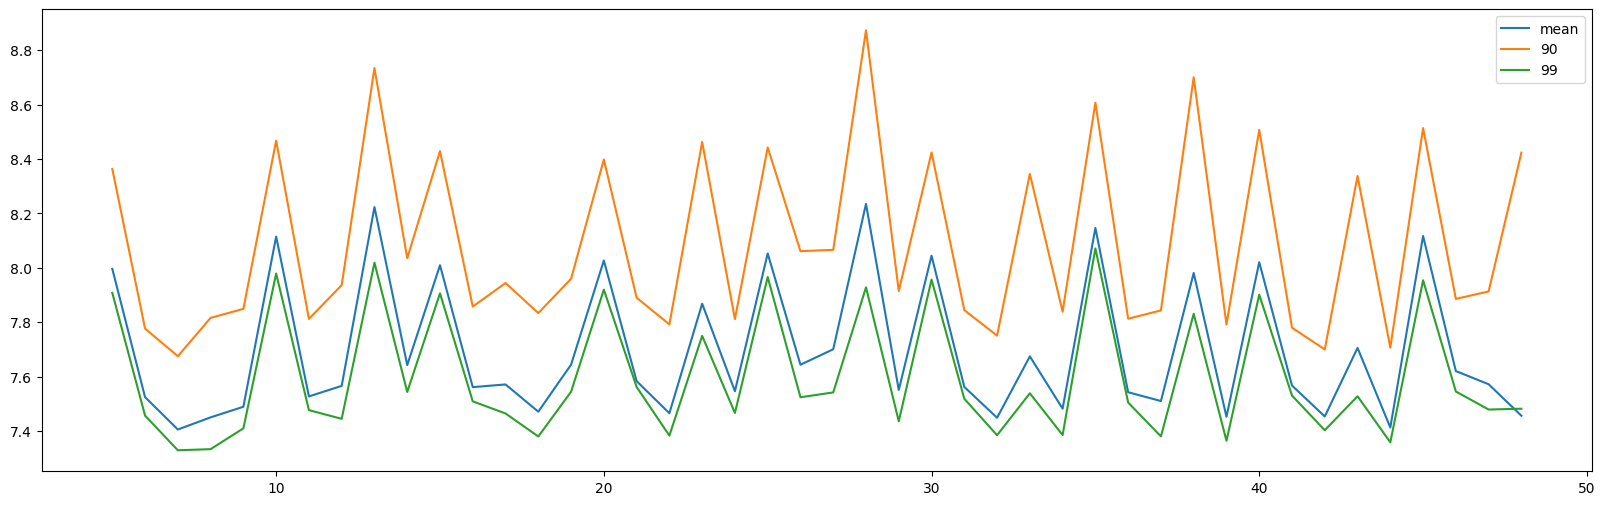

In [ ]:
startTime = int(booksArrayClust[1].iloc[0:1])
endTime = int(booksArrayClust[1].iloc[-1])
maxTime = round((endTime-startTime)/60)
means = []
nintieth = []
ninetyNine = []

for i in range(maxTime):
  means.append(booksArrayClust[2][(booksArrayClust[1] >= startTime+60*(i)) & (booksArrayClust[1] < startTime+60*(1+i))].mean())
  nintieth.append(booksArrayClust[2][(booksArrayClust[1] >= startTime+60*(i)) & (booksArrayClust[1] < startTime+60*(1+i))].quantile(0.9))
  ninetyNine.append(booksArrayClust[2][(booksArrayClust[1] >= startTime+60*(i)) & (booksArrayClust[1] < startTime+60*(1+i))].quantile(0.5))
booksClust = pd.DataFrame(np.array([means,nintieth,ninetyNine]), index = ['mean', '90','99'])
booksClust.T.iloc[5:].plot()
# print(booksClust.T.iloc[5:].describe())
# print(booksClust.T.iloc[5:].quantile(0.9))

In [ ]:
startTime = int(booksArrayBin[1].iloc[0:1])
endTime = int(booksArrayBin[1].iloc[-1])
maxTime = round((endTime-startTime)/60)
means = []
nintieth = []

for i in range(maxTime):
  means.append(booksArrayBin[2][(booksArrayBin[1] >= startTime+60*(i)) & (booksArrayBin[1] < startTime+60*(1+i))].mean())
  nintieth.append(booksArrayBin[2][(booksArrayBin[1] >= startTime+60*(i)) & (booksArrayBin[1] < startTime+60*(1+i))].quantile(0.9))
booksBin = pd.DataFrame(np.array([means,nintieth]), index = ['mean', '90'])
#booksBin.T.iloc[5:].plot()
#print(booksBin.T.iloc[5:].describe())
# print(booksBin.T.iloc[5:].quantile(0.9))

In [ ]:
if confidence:
  print(np.corrcoef(loginClust.loc['mean'], loginBase.loc['mean']))
  print(np.corrcoef(booksClust.loc['mean'], booksBase.loc['mean']))

  print(np.corrcoef(loginBin.loc['mean'], loginBase.loc['mean']))
  print(np.corrcoef(booksBin.loc['mean'], booksBase.loc['mean']))

  print(np.corrcoef(loginClust.loc['mean'], loginBin.loc['mean']))
  print(np.corrcoef(booksClust.loc['mean'], booksBin.loc['mean']))

  print(print(scipy.stats.ttest_ind(a=loginClust.loc['mean'], b=loginBase.loc['mean'], equal_var=True)))
  print(print(scipy.stats.ttest_ind(a=booksClust.loc['mean'], b=booksBase.loc['mean'], equal_var=True)))

In [ ]:
warmup = 5

startTime = int(booksArray[1].iloc[0:1])
warmupTime = warmup*60 + startTime
books_noWarmupMean = booksArray[2][booksArray[1] >= warmupTime].mean()
books_noWarmup90 = booksArray[2][booksArray[1] >= warmupTime].quantile(0.9)
books_noWarmupStd = booksArray[2][booksArray[1] >= warmupTime].std()
books_noWarmupMax = booksArray[2][booksArray[1] >= warmupTime].max()
startTime = int(loginArray[1].iloc[0:1])
warmupTime = warmup*60 + startTime
login_noWarmupMean = loginArray[2][loginArray[1] >= warmupTime].mean()
login_noWarmup90 = loginArray[2][loginArray[1] >= warmupTime].quantile(0.9)
login_noWarmupMax = loginArray[2][loginArray[1] >= warmupTime].max()
login_noWarmupStd = loginArray[2][loginArray[1] >= warmupTime].std()


startTime = int(booksArrayClust[1].iloc[0:1])
warmupTime = warmup*60 + startTime
books_clust_noWarmupMean = booksArrayClust[2][booksArrayClust[1] >= warmupTime].mean()
books_clust_noWarmup90 = booksArrayClust[2][booksArrayClust[1] >= warmupTime].quantile(0.9)
books_clust_noWarmupMax = booksArrayClust[2][booksArrayClust[1] >= warmupTime].max()
books_clust_noWarmupStd = booksArrayClust[2][booksArrayClust[1] >= warmupTime].std()
startTime = int(loginArrayClust[1].iloc[0:1])
warmupTime = warmup*60 + startTime
login_clust_noWarmupMean = loginArrayClust[2][loginArrayClust[1] >= warmupTime].mean()
login_clust_noWarmup90 = loginArrayClust[2][loginArrayClust[1] >= warmupTime].quantile(0.9)
login_clust_noWarmupMax = loginArrayClust[2][loginArrayClust[1] >= warmupTime].max()
login_clust_noWarmupStd = loginArrayClust[2][loginArrayClust[1] >= warmupTime].std()

startTime = int(booksArrayBin[1].iloc[0:1])
warmupTime = warmup*60 + startTime
books_bin_noWarmupMean = booksArrayBin[2][booksArrayBin[1] >= warmupTime].mean()
books_bin_noWarmup90 = booksArrayBin[2][booksArrayBin[1] >= warmupTime].quantile(0.9)
books_bin_noWarmupMax = booksArrayBin[2][booksArrayBin[1] >= warmupTime].max()
books_bin_noWarmupStd = booksArrayBin[2][booksArrayBin[1] >= warmupTime].std()
startTime = int(loginArrayBin[1].iloc[0:1])
warmupTime = warmup*60 + startTime
login_bin_noWarmupMean = loginArrayBin[2][loginArrayBin[1] >= warmupTime].mean()
login_bin_noWarmup90 = loginArrayBin[2][loginArrayBin[1] >= warmupTime].quantile(0.9)
login_bin_noWarmupMax = loginArrayBin[2][loginArrayBin[1] >= warmupTime].max()
login_bin_noWarmupStd = loginArrayBin[2][loginArrayBin[1] >= warmupTime].std()

print("Source")
print(tabulate([['Stat','Write', "Bogo"], ["Mean", books_noWarmupMean, login_noWarmupMean], ['90', books_noWarmup90, login_noWarmup90], ['Max', books_noWarmupMax, login_noWarmupMax], ['Std', books_noWarmupStd, login_noWarmupStd]]))
print("Cluster")
print(tabulate([['Stat','Write', "Bogo"], ["Mean", books_clust_noWarmupMean, login_clust_noWarmupMean], ['90', books_clust_noWarmup90, login_clust_noWarmup90], ['Max', books_clust_noWarmupMax, login_clust_noWarmupMax], ['Std', books_clust_noWarmupStd, login_clust_noWarmupStd]]))
print("Bin")
print(tabulate([['Stat','Write', "Bogo"], ["Mean", books_bin_noWarmupMean, login_bin_noWarmupMean], ['90', books_bin_noWarmup90, login_bin_noWarmup90], ['Max', books_bin_noWarmupMax, login_bin_noWarmupMax], ['Std', books_bin_noWarmupStd, login_bin_noWarmupStd]]))

Source
----  ------------------  ------------------
Stat  Write               Bogo
Mean  8.031473710057007   14.791836265329765
90    8.750618            15.61677
Max   50.383692           107.374061
Std   1.1681948013894807  5.058103155512486
----  ------------------  ------------------
Cluster
----  ------------------  ------------------
Stat  Write               Bogo
Mean  7.668790980181548   14.406152375617491
90    8.223978800000001   14.9949196
Max   67.28966            103.184582
Std   0.9025762195281539  5.014938533426885
----  ------------------  ------------------
Bin
----  ------------------  ------------------
Stat  Write               Bogo
Mean  7.723484153104962   13.677248963324157
90    8.3006252           14.2258924
Max   74.906314           80.992732
Std   0.8216839063906525  1.335260666240167
----  ------------------  ------------------


In [ ]:
#Single minute comparisons
indicesC = [[1, 11, 12, 14, 17, 24, 27, 34], [44, 46], [41, 50, 51, 52, 53], [0, 9, 10, 13, 16, 23, 25, 26, 33, 35, 36], [15, 37, 42, 54], [47, 56], [38, 43, 55], [48, 57], [2, 3, 4, 5, 6, 7, 8, 18, 19, 20, 21, 22, 28, 29, 30, 31, 32], [39, 40, 45, 49]]
indicesB = [[4, 14, 15, 16, 19, 20, 22, 23, 36, 38], [1, 11, 27, 34, 37, 51, 53, 55], [0, 2, 18, 25, 26, 35], [3, 13, 21, 28, 33], [8, 9, 10], [24, 52, 54], [39, 42, 47], [44, 45, 56], [5, 6], [7, 32]]
# indicesC = []
# for i in range(60):
#   indicesC.append([i])

methods = ["clust"]
#methods = ["clust", "bin"]
windowSize = 1
warmup = 5
compare = False

if compare == True:
  for method in methods:
    avgMeanDiffb = 0
    avg90Diffb = 0
    avgMeanDiffl = 0
    avg90Diffl = 0
    if method == "clust":
      print(method)
      indices = indicesC
      for b in range(len(indices)):
          indiceInfo = [["Index", "Stat", "Books", "Logins"]]
          lMean = []
          bMean = []
          l90 = []
          b90 = []
          for i in indices[b]:
            start=warmup+i
            end=windowSize+warmup+i
            lMean.append(loginBase.T.iloc[start:end]['mean'].astype('float'))
            bMean.append(booksBase.T.iloc[start:end]['mean'].astype('float'))
            l90.append(loginBase.T.iloc[start:end]['90'].astype('float'))
            b90.append(booksBase.T.iloc[start:end]['90'].astype('float'))
          setStats = []
          setStats.append(["Stat", "Books", "Logins"])
          setStats.append(["ClustMean", booksClust.T['mean'].iloc[warmup+b:warmup+b+windowSize].astype('float'), loginClust.T['mean'].iloc[warmup+b:warmup+b+windowSize].astype('float')])
          setStats.append(["Clust90", booksClust.T['90'].iloc[warmup+b:warmup+b+windowSize].astype('float'), loginClust.T['90'].iloc[warmup+b:warmup+b+windowSize].astype('float')])
          setStats.append(["Mean", np.mean(bMean), np.mean(lMean)])
          setStats.append(["90", np.mean(b90), np.mean(l90)])
          setStats.append(["Mean_Diff", np.mean(bMean)-float(booksClust.T['mean'].iloc[warmup+b:warmup+b+windowSize]), np.mean(lMean)-float(loginClust.T['mean'].iloc[warmup+b:warmup+b+windowSize])])
          setStats.append(["90_Diff", np.mean(b90)-float(booksClust.T['90'].iloc[warmup+b:warmup+b+windowSize]), np.mean(l90)-float(loginClust.T['90'].iloc[warmup+b:warmup+b+windowSize])])
          #print(tabulate(setStats))
          avgMeanDiffb += abs(np.mean(bMean)-float(booksClust.T['mean'].iloc[warmup+b:warmup+b+windowSize]))
          avg90Diffb += abs(np.mean(b90)-float(booksClust.T['90'].iloc[warmup+b:warmup+b+windowSize]))
          avgMeanDiffl += abs(np.mean(lMean)-float(loginClust.T['mean'].iloc[warmup+b:warmup+b+windowSize]))
          avg90Diffl += abs(np.mean(l90)-float(loginClust.T['90'].iloc[warmup+b:warmup+b+windowSize]))
      print(tabulate([["Stat", "Write", "Bogo"], ['mean', avgMeanDiffb/len(indices), avgMeanDiffl/len(indices)], ['90', avg90Diffb/len(indices), avg90Diffl/len(indices)]]))
    elif method == "bin":
      print(method)
      indices = indicesC
      for b in range(len(indices)):
          indiceInfo = [["Index", "Stat", "Books", "Logins"]]
          lMean = []
          bMean = []
          l90 = []
          b90 = []
          for i in indices[b]:
            start=warmup+i
            end=windowSize+warmup+i
            lMean.append(float(loginBase.T.iloc[start:end]['mean']))
            bMean.append(float(booksBase.T.iloc[start:end]['mean']))
            l90.append(float(loginBase.T.iloc[start:end]['90']))
            b90.append(float(booksBase.T.iloc[start:end]['90']))
            indiceInfo.append([i, "mean", float(booksBase.T.iloc[start:end]['mean']), float(loginBase.T.iloc[start:end]['mean'])])
            indiceInfo.append([i, "90", float(booksBase.T.iloc[start:end]['90']), float(loginBase.T.iloc[start:end]['90'])])
          setStats = []
          setStats.append(["Stat", "Books", "Logins"])
          setStats.append(["ClustMean", float(booksBin.T['mean'].iloc[warmup+b:warmup+b+windowSize]), float(loginBin.T['mean'].iloc[warmup+b:warmup+b+windowSize])])
          setStats.append(["Clust90", float(booksBin.T['90'].iloc[warmup+b:warmup+b+windowSize]), float(loginBin.T['90'].iloc[warmup+b:warmup+b+windowSize])])
          setStats.append(["Mean", np.mean(bMean), np.mean(lMean)])
          setStats.append(["90", np.mean(b90), np.mean(l90)])
          setStats.append(["Mean_Diff", np.mean(bMean)-float(booksBin.T['mean'].iloc[warmup+b:warmup+b+windowSize]), np.mean(lMean)-float(loginBin.T['mean'].iloc[warmup+b:warmup+b+windowSize])])
          setStats.append(["90_Diff", np.mean(b90)-float(booksBin.T['90'].iloc[warmup+b:warmup+b+windowSize]), np.mean(l90)-float(loginBin.T['90'].iloc[warmup+b:warmup+b+windowSize])])
          #print(tabulate(setStats))
          avgMeanDiffb += abs(np.mean(bMean)-float(booksBin.T['mean'].iloc[warmup+b:warmup+b+windowSize]))
          avg90Diffb += abs(np.mean(b90)-float(booksBin.T['90'].iloc[warmup+b:warmup+b+windowSize]))
          avgMeanDiffl += abs(np.mean(lMean)-float(loginBin.T['mean'].iloc[warmup+b:warmup+b+windowSize]))
          avg90Diffl += abs(np.mean(l90)-float(loginBin.T['90'].iloc[warmup+b:warmup+b+windowSize]))
      print(tabulate([["Stat", "Write", "Bogo"], ['mean', avgMeanDiffb/len(indices), avgMeanDiffl/len(indices)], ['90', avg90Diffb/len(indices), avg90Diffl/len(indices)]]))

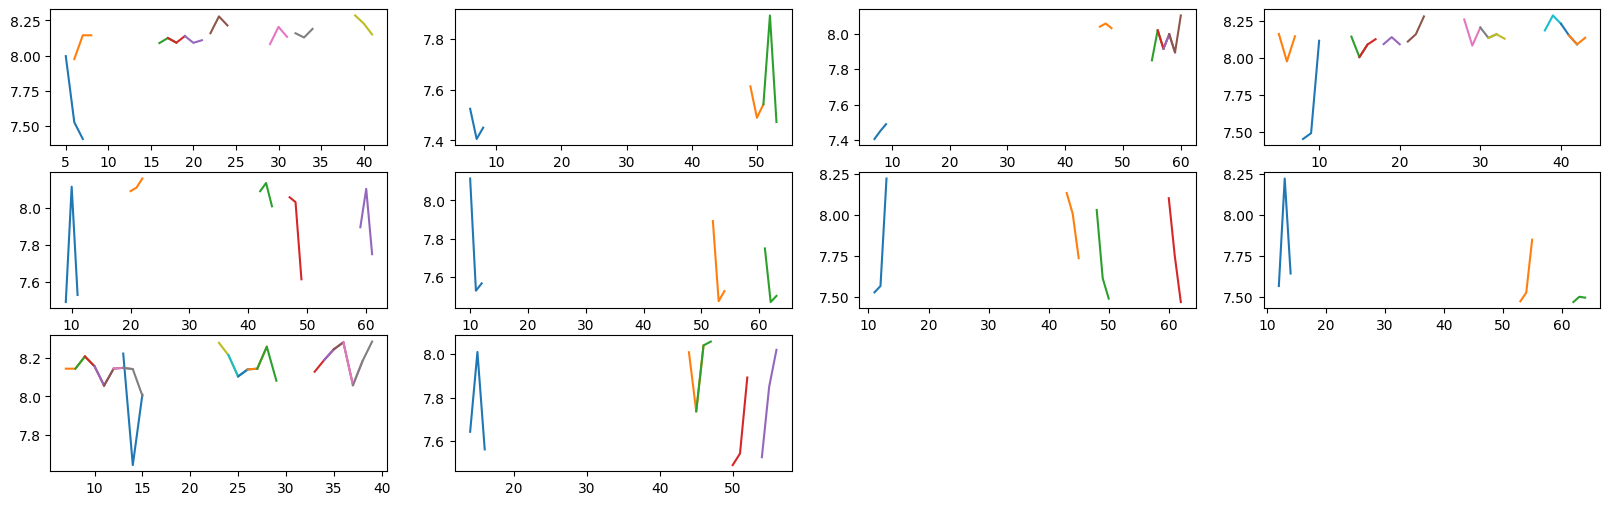

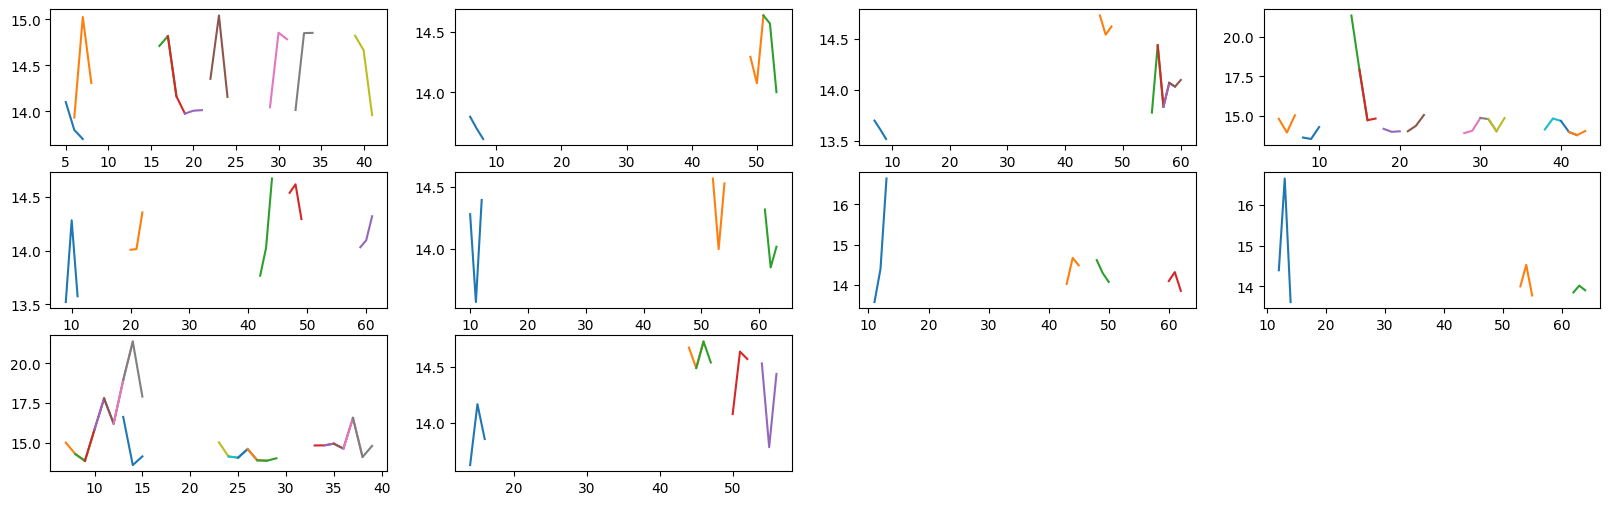

In [ ]:
clusterIndices = [[1, 11, 12, 14, 17, 24, 27, 34], [44, 46], [41, 50, 51, 52, 53], [0, 9, 10, 13, 16, 23, 25, 26, 33, 35, 36], [15, 37, 42, 54], [47, 56], [38, 43, 55], [48, 57], [2, 3, 4, 5, 6, 7, 8, 18, 19, 20, 21, 22, 28, 29, 30, 31, 32], [39, 40, 45, 49]]
windowSize = 3

count = 0
for indices in clusterIndices:
  plt.subplot(3, 4, count+1)
  #plt.plot(booksClust.T['mean'].iloc[warmup+count:warmup+count+windowSize].reset_index(drop=True))
  plt.plot(booksClust.T['mean'].iloc[warmup+count:warmup+count+windowSize])
  #plt.xticks(range(windowSize))
  for i in indices:
    #plt.plot(booksBase.T['mean'].iloc[warmup+i:warmup+i+windowSize].reset_index(drop=True))
    plt.plot(booksBase.T['mean'].iloc[warmup+i:warmup+i+windowSize])
    #plt.xticks(range(windowSize))
  count += 1
plt.show()

count = 0
for indices in clusterIndices:
  plt.subplot(3, 4, count+1)
  #plt.plot(loginClust.T['mean'].iloc[warmup+count:warmup+count+windowSize].reset_index(drop=True))
  plt.plot(loginClust.T['mean'].iloc[warmup+count:warmup+count+windowSize])
  #plt.xticks(range(windowSize))
  for i in indices:
    #plt.plot(loginBase.T['mean'].iloc[warmup+i:warmup+i+windowSize].reset_index(drop=True))
    plt.plot(loginBase.T['mean'].iloc[warmup+i:warmup+i+windowSize])
    #plt.xticks(range(windowSize))
  count += 1
plt.show()

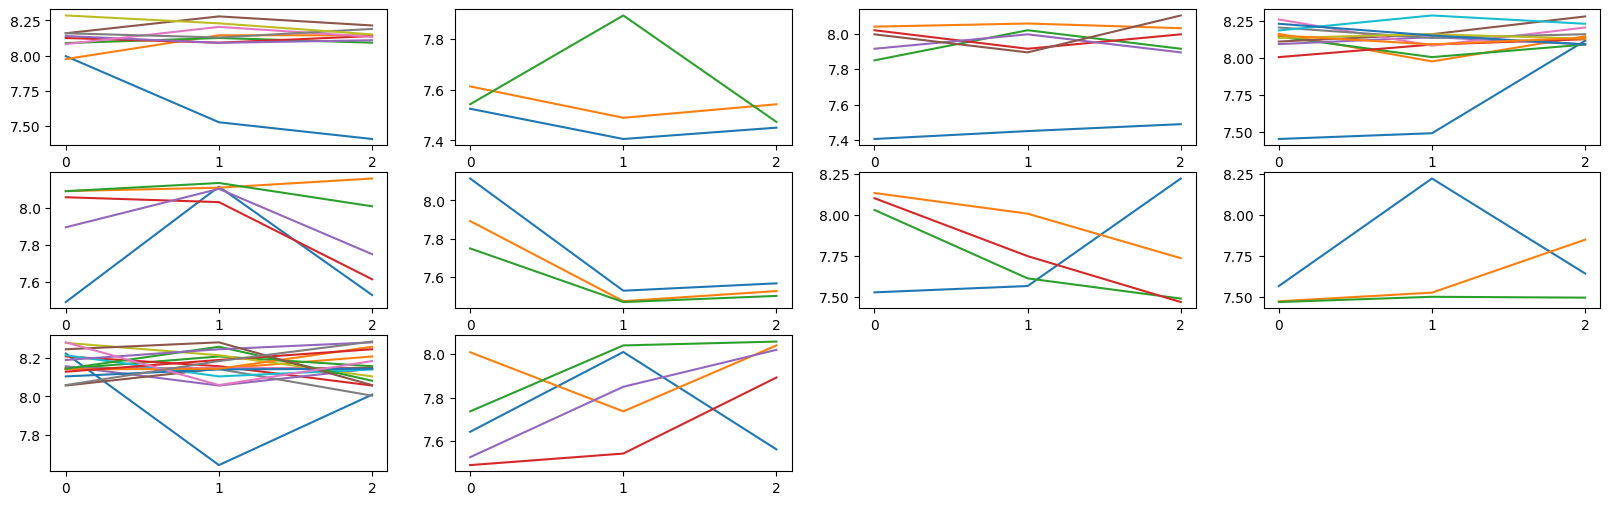

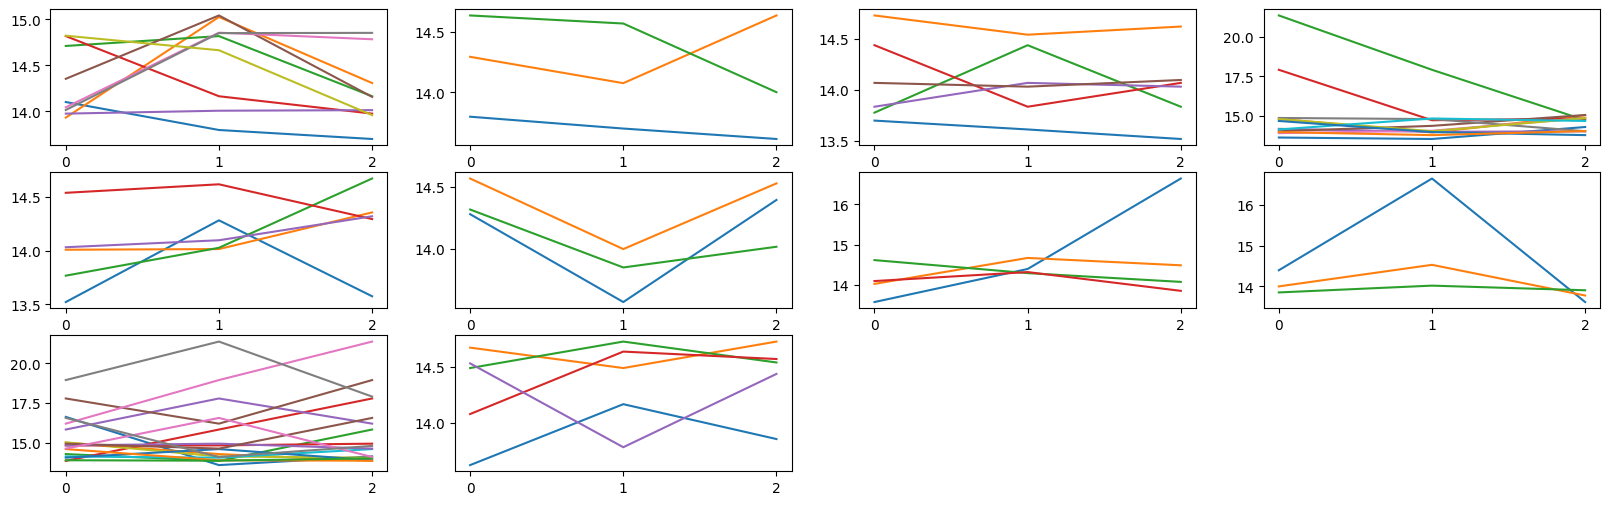

In [ ]:
count = 0
for indices in clusterIndices:
  plt.subplot(3, 4, count+1)
  plt.plot(booksClust.T['mean'].iloc[warmup+count:warmup+count+windowSize].reset_index(drop=True))
  plt.xticks(range(windowSize))
  for i in indices:
    plt.plot(booksBase.T['mean'].iloc[warmup+i:warmup+i+windowSize].reset_index(drop=True))
    plt.xticks(range(windowSize))
  count += 1
plt.show()

count = 0
for indices in clusterIndices:
  plt.subplot(3, 4, count+1)
  plt.plot(loginClust.T['mean'].iloc[warmup+count:warmup+count+windowSize].reset_index(drop=True))
  plt.xticks(range(windowSize))
  for i in indices:
    plt.plot(loginBase.T['mean'].iloc[warmup+i:warmup+i+windowSize].reset_index(drop=True))
    plt.xticks(range(windowSize))
  count += 1
plt.show()

In [ ]:
count = 0
for indices in clusterIndices:
  tempList = []
  print("Cluster ", booksClust.T['mean'].iloc[warmup+count:warmup+count+windowSize].mean())
  for i in indices:
    tempList.append(booksBase.T['mean'].iloc[warmup+i:warmup+i+windowSize].mean())
  print("Actual ", sum(tempList)/len(tempList))
  count += 1
print()
count = 0
for indices in clusterIndices:
  tempList = []
  print("Cluster ", loginClust.T['mean'].iloc[warmup+count:warmup+count+windowSize].mean())
  for i in indices:
    tempList.append(loginBase.T['mean'].iloc[warmup+i:warmup+i+windowSize].mean())
  print("Actual ", sum(tempList)/len(tempList))
  count += 1

Cluster  7.642230859747787
Actual  8.14486093794895
Cluster  7.460385306753189
Actual  7.592005429588333
Cluster  7.448571015826832
Actual  7.97601393266816
Cluster  7.684814803399466
Actual  8.139570616382406
Cluster  7.710497437778902
Actual  8.003177233490982
Cluster  7.736051037566689
Actual  7.601311947369965
Cluster  7.772219852123306
Actual  7.814654479237895
Cluster  7.8105615498197265
Actual  7.5519448814222345
Cluster  7.958325293138231
Actual  8.161982204368265
Cluster  7.737838227972413
Actual  7.827965957639561

Cluster  13.867539192798892
Actual  14.43108830966977
Cluster  13.70497034845385
Actual  14.368069294230253
Cluster  13.612763457232619
Actual  14.159949053611859
Cluster  13.806273648387409
Actual  14.806982896934251
Cluster  13.79322866332447
Actual  14.228015856459297
Cluster  14.084516202638497
Actual  14.215276411592166
Cluster  14.87081208537652
Actual  14.270987492725453
Cluster  14.88510213308547
Actual  14.014965640035378
Cluster  14.807770850116482
Actual

In [ ]:
#For comparing random distributed load vs real load
random = False
if random:
  warmup = 5
  indices = [[3], [44], [53], [57], [47], [24], [31], [30], [56], [6], [46], [8], [50], [11], [14], [52], [45], [21], [49], [28], [7], [29], [51], [36], [19], [54], [17], [18], [10], [9], [23], [59], [37], [13], [32], [12], [39], [26], [38], [58], [22], [55], [40], [25], [20], [1], [15], [0], [34], [27], [33], [2], [16], [42], [43], [5], [35], [41], [4], [48]]
  realB = [0]*60
  realL = [0]*60
  for i in range(len(indices)):
    realB[indices[i][0]] = [float(booksClust.T['mean'].iloc[warmup+i:warmup+i+windowSize]), booksBase.T['mean'].iloc[warmup+i] ]
    realL[indices[i][0]] = [float(loginClust.T['mean'].iloc[warmup+i:warmup+i+windowSize]), loginBase.T['mean'].iloc[warmup+i] ]

  ninetyB = [0]*60
  ninetyL = [0]*60
  for i in range(len(indices)):
    ninetyB[indices[i][0]] = [float(booksClust.T['90'].iloc[warmup+i:warmup+i+windowSize]), booksBase.T['90'].iloc[warmup+i] ]
    ninetyL[indices[i][0]] = [float(loginClust.T['90'].iloc[warmup+i:warmup+i+windowSize]), loginBase.T['90'].iloc[warmup+i] ]

  pd.DataFrame(realB).plot()
  plt.legend(["Random", "Base"])
  plt.title("Bubblesort Service")
  pd.DataFrame(realL).plot()
  plt.legend(["Random", "Base"])
  plt.title("Bogosort Service")

  pd.DataFrame(ninetyB).plot()
  plt.legend(["Random", "Base"])
  plt.title("Bubblesort Service 90 Percentile")
  pd.DataFrame(ninetyL).plot()
  plt.legend(["Random", "Base"])
  plt.title("Bogosort Service 90 Percentile")

In [ ]:
compare = False
time = 60
if compare:
  warmup = 5
  realB = [0]*time
  realL = [0]*time
  for i in range(len(indices)):
    # realB[indices[i][0]] = [booksClust.T['mean'].iloc[warmup+i], booksBase.T['mean'].iloc[warmup+i], booksBin.T['mean'].iloc[warmup+i]]
    # realL[indices[i][0]] = [loginClust.T['mean'].iloc[warmup+i], loginBase.T['mean'].iloc[warmup+i], loginBin.T['mean'].iloc[warmup+i] ]
    realB[indices[i][0]] = [booksClust.T['mean'].iloc[warmup+i], booksBase.T['mean'].iloc[warmup+i]]
    realL[indices[i][0]] = [loginClust.T['mean'].iloc[warmup+i], loginBase.T['mean'].iloc[warmup+i]]
  ninetyB = [0]*time
  ninetyL = [0]*time
  for i in range(len(indices)):
    ninetyB[indices[i][0]] = [booksClust.T['90'].iloc[warmup+i], booksBase.T['90'].iloc[warmup+i] ]
    ninetyL[indices[i][0]] = [loginClust.T['90'].iloc[warmup+i], loginBase.T['90'].iloc[warmup+i] ]

  ninetyNineB = [0]*time
  ninetyNineL = [0]*time
  for i in range(len(indices)):
    ninetyNineB[indices[i][0]] = [booksClust.T['99'].iloc[warmup+i], booksBase.T['99'].iloc[warmup+i] ]
    ninetyNineL[indices[i][0]] = [loginClust.T['99'].iloc[warmup+i], loginBase.T['99'].iloc[warmup+i] ]

  print(realB[59])
  pd.DataFrame(realB).plot()
  plt.legend(["Rerun", "Base"])
  plt.title("Bubblesort Service")
  pd.DataFrame(realL).plot()
  plt.legend(["Rerun", "Base"])
  plt.title("Bogosort Service")

  pd.DataFrame(ninetyB).plot()
  plt.legend(["Rerun", "Base"])
  plt.title("Bubblesort Service 90 Percentile")
  pd.DataFrame(ninetyL).plot()
  plt.legend(["Rerun", "Base"])
  plt.title("Bogosort Service 90 Percentile")

  pd.DataFrame(ninetyNineB).plot()
  plt.legend(["Rerun", "Base"])
  plt.title("Bubblesort Service 50 Percentile")
  pd.DataFrame(ninetyNineL).plot()
  plt.legend(["Rerun", "Base"])
  plt.title("Bogosort Service 50 Percentile")

In [ ]:
#for compiling numerous files
restart = False
if restart:
  warmup = 5
  booksTemp = []
  loginTemp = []
  for i in range(10):
    csvName = str(i)+'_restart'
    csvArray = pd.read_csv(DATASET_PATH+csvName+'.csv', header=None, usecols=[0,1,2,])
    loginArrayR = csvArray[csvArray[0].eq("get_bogo_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)
    booksArrayR = csvArray[csvArray[0].eq("get_write_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)

    startTime = int(booksArrayR[1].iloc[0:1])
    warmupTime = warmup*60 + startTime
    booksFilteredR = booksArrayR[2][booksArrayR[1] >= warmupTime].mean()
    booksTemp.append(booksFilteredR)

    startTime = int(loginArrayR[1].iloc[0:1])
    warmupTime = warmup*60 + startTime
    loginFilteredR = loginArrayR[2][loginArrayR[1] >= warmupTime].mean()
    loginTemp.append(loginFilteredR)

  indicesC = [[16, 20, 24, 37, 43, 54, 55, 56, 59], [31, 35, 39, 40], [0, 2, 4, 11, 12, 21, 33, 48, 49], [1, 38, 42, 46], [30], [9, 22, 25, 27, 28, 36, 47, 50, 51, 52], [41, 44, 45, 57, 58], [5, 13, 14, 17, 18, 19, 26, 34, 53], [32], [3, 6, 7, 8, 10, 15, 23, 29]]


  methods = ["clust"]
  windowSize = 1
  warmup = 5

  for method in methods:
    avgMeanDiffb = 0
    avgMeanDiffl = 0
    if method == "clust":
      print(method)
      indices = indicesC
      for b in range(len(indices)):
          indiceInfo = [["Index", "Stat", "Books", "Logins"]]
          lMean = []
          bMean = []
          l90 = []
          b90 = []
          for i in indices[b]:
            start=warmup+i
            end=windowSize+warmup+i
            lMean.append(float(loginBase.T.iloc[start:end]['mean']))
            bMean.append(float(booksBase.T.iloc[start:end]['mean']))
          setStats = []
          setStats.append(["Stat", "Books", "Logins"])
          setStats.append(["ClustMean", booksTemp[b], loginTemp[b]])
          setStats.append(["Mean", np.mean(bMean), np.mean(lMean)])
          setStats.append(["Mean_Diff", np.mean(bMean)-booksTemp[b], np.mean(lMean)-loginTemp[b]])
          print(tabulate(setStats))
          avgMeanDiffb += abs(np.mean(bMean)-np.mean(bMean)-booksTemp[b])
          avgMeanDiffl += abs(np.mean(lMean)-loginTemp[b])
      print(tabulate([["Stat", "Write", "Bogo"], ['mean', avgMeanDiffb/len(indices), avgMeanDiffl/len(indices)]]))

In [ ]:
# indices = [16, 20, 24, 37, 43, 54, 55, 56, 59]
# centroid = 4
# method = "clust"
# warmup = 5
# windowSize = 1
# startm = warmup+centroid
# endm = windowSize+warmup+centroid

# if method == "clust":
#   clustInfo = [["Index", "Stat", "Books", "Logins"]]
#   clustInfo.append([centroid, "mean", float(booksClust.T['mean'].iloc[startm:endm]), float(loginClust.T['mean'].iloc[startm:endm])])
#   clustInfo.append([centroid, "90", float(booksClust.T['90'].iloc[startm:endm]), float(loginClust.T['90'].iloc[startm:endm])])
#   print(tabulate(clustInfo))
#   indiceInfo = [["Index", "Stat", "Books", "Logins"]]
#   lMean = []
#   bMean = []
#   l90 = []
#   b90 = []
#   for i in indices:
#     start=warmup+i
#     end=windowSize+warmup+i
#     lMean.append(float(loginBase.T.iloc[start:end]['mean']))
#     bMean.append(float(booksBase.T.iloc[start:end]['mean']))
#     l90.append(float(loginBase.T.iloc[start:end]['90']))
#     b90.append(float(booksBase.T.iloc[start:end]['90']))
#     indiceInfo.append([i, "mean", float(booksBase.T.iloc[start:end]['mean']), float(loginBase.T.iloc[start:end]['mean'])])
#     indiceInfo.append([i, "90", float(booksBase.T.iloc[start:end]['90']), float(loginBase.T.iloc[start:end]['90'])])
#   print(tabulate(indiceInfo))
#   print(tabulate([["Stat", "Books", "Logins"], ["Mean", np.mean(bMean), np.mean(lMean)], ["90", np.mean(b90), np.mean(l90)], ["Mean_Diff", np.mean(bMean)-float(booksClust.T['mean'].iloc[startm:endm]), np.mean(lMean)-float(loginClust.T['mean'].iloc[startm:endm])], ["90_Diff", np.mean(b90)-float(booksClust.T['90'].iloc[startm:endm]), np.mean(l90)-float(loginClust.T['90'].iloc[startm:endm])]]))